In [1]:
import sys
import numpy as np
import string
import matplotlib.pyplot as plt
# add the path of gotmtool
sys.path.append("../gotmtool")
from gotmtool import *
from gotmtool.diags import *

## Load data

First, store the information of the four simulations into lists and dictionaries. 

In [2]:
# mlabel = 'GLS-C01A'
mlabel = 'KPP-CVMix'
# glabel = 'group1'
glabel = 'group2'
casenames = [
    '_'.join([glabel, 'case1', mlabel]),
    '_'.join([glabel, 'case2', mlabel]),
    '_'.join([glabel, 'case3', mlabel]),
    ]

labels = {
    casenames[0]: 'Case1',
    casenames[1]: 'Case2',
    casenames[2]: 'Case3',
    }

colors = {
    casenames[0]: 'tab:blue',
    casenames[1]: 'tab:olive',
    casenames[2]: 'tab:red',
    }

linestyles = {
    casenames[0]: '-',
    casenames[1]: '-',
    casenames[2]: '-',
    }

casedir = '../gotm/run/Constant_forcing'
save_fig = True

Load data for the four simulations into a dictionary.

In [3]:
sims = {}
dataset = {}
for case in casenames:
    sim = Simulation(path=casedir+'/'+case)
    sims[case] = sim
    dataset[case] = sim.load_data()

## Figure 1


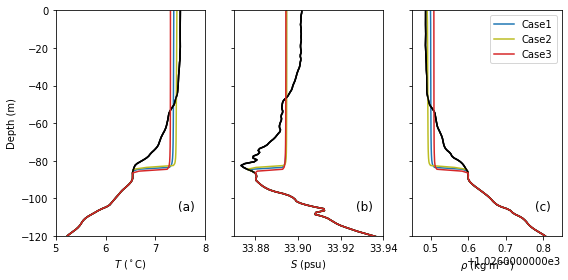

In [4]:
fig, axarr = plt.subplots(1,3, sharey='row')
fig.set_size_inches([8,4])
for case in casenames:
    data = dataset[case]
    data.temp[:,0,0,0].plot(y='z', ax=axarr[0], color='k')
    data.salt[:,0,0,0].plot(y='z', ax=axarr[1], color='k')
    data.rho[:,0,0,0].plot(y='z', ax=axarr[2], color='k')
    data.temp[:,-1,0,0].plot(y='z', ax=axarr[0], color=colors[case])
    data.salt[:,-1,0,0].plot(y='z', ax=axarr[1], color=colors[case])
    data.rho[:,-1,0,0].plot(y='z', ax=axarr[2], color=colors[case], label=labels[case])

for i in np.arange(3):
    axarr[i].set_title('') 
    axarr[i].set_ylabel('') 
    
axarr[0].set_ylim([-120,0])
axarr[0].set_xlim([5,8])
axarr[0].set_ylabel('Depth (m)')
axarr[0].set_xlabel('$T$ ($^\circ$C)')
axarr[1].set_xlabel('$S$ (psu)')
axarr[1].set_xlim([33.87,33.94])
axarr[2].set_xlabel('$\\rho$ (kg m$^{-3}$)')
axarr[2].set_xlim([1026.45,1026.85])
axarr[2].ticklabel_format(axis="x", style="sci", scilimits=(-2,2))

axarr[2].legend(loc='upper right')

for i, ax in enumerate(axarr):
    ax.text(0.82, 0.1, '('+string.ascii_lowercase[i]+')', transform=ax.transAxes,
            fontsize=12, va='bottom')

if save_fig:
    plt.tight_layout()
    figname = 'constant_forcing_pfl_{}_{}.pdf'.format(glabel, mlabel)
    fig.savefig(figname, dpi=300)

## Figure 2

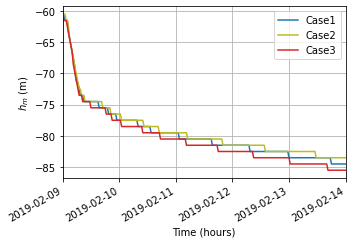

In [5]:
fig = plt.figure(figsize=[5,3.5])
for case in casenames:
    data = dataset[case]
    time = data.time
#     NN = data.NN[:,:,0,0]
#     mld = get_bld_maxNN(NN)
#     temp = data.temp
#     mld = -get_mld_deltaT(temp[:,:,0,0])
    rho = data.rho
    mld = -get_mld_deltaR(rho[:,:,0,0])
    plt.plot(time, mld.values, color=colors[case], linestyle=linestyles[case], label=labels[case])
#     plt.scatter(hours, mld.values, s=10, color=colors[case], label=labels[case])
plt.ylabel('$h_m$ (m)')
plt.xlabel('Time (hours)')
plt.xlim([time[0], time[-1]])
# plt.ylim([0,35])
plt.legend(loc='upper right')
plt.grid()
fig.autofmt_xdate()
if save_fig:
    plt.tight_layout()
    figname = 'constant_forcing_ts_{}_{}.pdf'.format(glabel, mlabel)
    fig.savefig(figname, dpi=300)